# Lesson 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Binary Classification

Logistic regression is widely used as a classification model. Logistic regression is a linear model, with a binary response, `{False, True}` or `{0, 1}`. You can think of this response as having a Binomial distribution. For linear regression the response is just, well, linear. Logistic regression is a linear regression model with a nonlinear output. The response of the linear model is transformed or 'squashed' to values close to 0 and 1 using a **sigmoidal function**, also known as the **logistic function**. The result of this transformation is a response which is the log likelihood for each of the two classes. 

$$f(x) = \frac{1}{1 + e^{-\kappa(x - x_0)}} \\
\kappa = steepness$$

Text(0.5,0,'Value of output from linear regression')

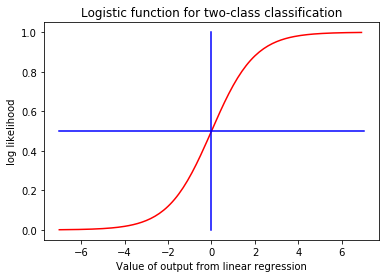

In [4]:
xseq = np.arange(-7, 7, 0.1)

logistic = [math.exp(v)/(1 + math.exp(v)) for v in xseq]

plt.plot(xseq, logistic, color = 'red')
plt.plot([-7,7], [0.5,0.5], color = 'blue')
plt.plot([0,0], [0,1], color = 'blue')
plt.title('Logistic function for two-class classification')
plt.ylabel('log likelihood')
plt.xlabel('Value of output from linear regression')

## Multi-Class Classification

To convert numbers into probabilities.

![Softmax](https://miro.medium.com/max/1812/1*670CdxchunD-yAuUWdI7Bw.png)


In [0]:
import torch
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

In [0]:
x = torch.range(1, 16)
# x = torch.arange(1, 16)

x.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


torch.Size([16])

In [0]:
# -1 is the inferred dimension, leftover!
x = x.view(4, -1) # change this number see what happens
x.shape

torch.Size([4, 4])

In [0]:
# contiguity
# https://jdhao.github.io/2019/07/10/pytorch_view_reshape_transpose_permute/
y = torch.randn(5, 4, 3, 2)
y_t = y.permute(0, 3, 2, 1)
y_t.shape
??y_t.view(-1, 4)

In [0]:
print(y.data_ptr(),y.reshape(3, -1).data_ptr())
print(id(y), id(y.reshape(3, -1)))

90022912 90022912
140344355317800 140344356008080


In [0]:
logits = [1., 2., 3.]
logits = torch.Tensor(logits)
# logits = torch.Tensor(logits).unsqueeze(0)
print(softmax(logits))

IndexError: ignored

In [0]:
softmax(logits).sum()

tensor(1.)

## Gradient Descent

# An Example